In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import math

from scipy import stats

from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
import os
import utils
from scipy.optimize import fmin_cg
import scipy.io as si

In [2]:
mydata = loadmat('data/ex3data1.mat')
mydata

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X, y = mydata['X'], mydata['y'].ravel()
#give numbers from 0 to 9
y[y == 10] = 0

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [6]:
y.shape

(5000,)

In [7]:
X.shape

(5000, 400)

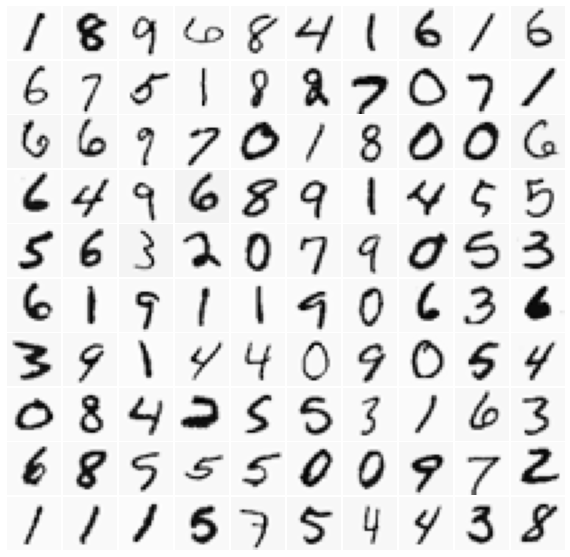

In [8]:
# Vitualize data 
# The code randomly selects selects 100 rows from X and passes those rows to the displayData function. This function maps each row to a 20 pixel by
#20 pixel grayscale image and displays the images together. The displayData function is given in the exersize.

m = y.size
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

===================================================================================================
# Feature Mapping
# In this problem we have two features (Test1 and Test 2) and one target (QA). We create more features to 28-dimention. X Up to degree=6

========================================================================================================
# Logistic Regression Hyphothesis

# $h_{\theta}(x)=g(\theta^T x)$

.
# Where g is sigmoind function

#  $g(z)=\frac{1}{1+e^{-z}}$

In [9]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

================================================================================================
# Cost Function
# $J(\theta)=\frac{1}{m}{\sum\limits_{i=1}^{m}}(-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)})))+\frac{\lambda}{2m}\sum\limits_{i=1}^{m}\theta_j^2$

In [10]:
def hypothesis(X,theta):
    htheta=sigmoid(np.dot(X,theta))
    return htheta

In [11]:
theta=np.zeros(X.shape[1])
theta.shape

(400,)

In [12]:
htheta=sigmoid(np.dot(X,theta))
htheta

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [13]:
htheta.shape

(5000,)

In [14]:
y.shape

(5000,)

In [15]:
X.shape

(5000, 400)

# Note that the first $\theta$ should be zero. Therefore we need to introduce lambda_arr

In [16]:
def computecost(theta,X,y,lambda_):
    m = len(y)  
    # We assign lambda_0 to zero, becasue we do not want to first term to have influence on regularization.
    #therefore, we have to move from lambda_ to array of lambda_ to be able to asssing zero to first term.
    lambda_arr = np.ones(len(theta)) * lambda_
    lambda_arr[0] = 0
    eps = 1e-10
    htheta=sigmoid(np.dot(X,theta))
    J = (1/m) * np.sum(-np.dot(np.log(htheta),y) - np.dot(np.log(1 - htheta+eps),(1 - y)))+ (1/(2 * m)) * np.sum(lambda_arr*np.square(theta))
    return J


In [17]:
lambda_=5
lambda_arr= np.ones(len(theta)) * lambda_
lambda_arr

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

# Check your cosfunction: For $\theta$ zeros the cost function should be 0.69.

In [18]:
#test
lambda_=1
theta = np.zeros(X.shape[1])
computecost(theta,X,y,lambda_)                                                                              

142.6496897189766

In [19]:
#test
lambda_=1
init_theta = np.ones(X.shape[1])
computecost(init_theta,X,y,lambda_)

4633.3661745486625

In [20]:
#test
lambda_=1
theta =np.arange(X.shape[1])
computecost(theta,X,y,lambda_)

6760.443792197003

In [21]:
init_theta = np.ones(X.shape[1])
init_theta.shape

(400,)

================================================================================================
# Gradient Descent
# Show that the cost function decreseae with iteration over gradient descent
#  $\theta_j = \theta_j-\frac{\alpha}{m}{\sum\limits_{i=1}^{m}}(h_{\theta}(x^{(i)})-y^i)x^{(i)}+\frac{\lambda}{m}\theta_j$

In [22]:
def gradientdescent(theta,X,y,lambda_):
    m=len(y)
    lambda_arr = np.ones(len(theta)) * lambda_
    lambda_arr[0] = 0
    htheta=sigmoid(np.dot(X,theta))
    descent = (1/m)*np.dot(X.T,(htheta - y))+(lambda_arr /m)*theta
    return descent


# Check your gradient descent for $\theta$ zeros and ones

In [23]:
#test
lambda_=1
theta = np.ones(X.shape[1])
gradientdescent(theta,X,y,lambda_)[0:20]

array([ 0.00000000e+00,  2.00000000e-04,  2.00000000e-04,  2.02257864e-04,
        2.17163545e-04, -4.47724891e-04, -6.24702754e-04, -1.32495346e-04,
        9.96793539e-05,  7.11223958e-05,  1.64317242e-04,  2.25632561e-04,
        2.63873816e-04,  3.45221865e-04,  3.56285488e-04,  2.88035216e-04,
        2.27617443e-04,  2.00185480e-04,  1.99707244e-04,  2.00000000e-04])

# Obtaining $\theta$ using fminunc for given $\lambda$

In [24]:
def oneVsAll(X, y, num_labels, lambda_):
    
    # sizes
    m, n = X.shape
    
    # Parameter array
    all_theta = np.zeros((num_labels, n+1))
    
    # Add ones to X data matrix
    X = np.hstack((np.ones((m, 1)), X))
    
    # Labels
    labels = np.arange(0, 10)
    
    for ct, lab in enumerate(labels):
        
        ynew = np.array(y==lab, dtype='int').flatten()
        
        # Set up bfgs minimization for label
        all_theta[ct,:] = fmin_cg(computecost, all_theta[ct,:], 
                                    fprime=gradientdescent, maxiter=9000, 
                                    args=(X, ynew, lambda_), disp=False)
        
    return all_theta

In [25]:
#check
all_theta=np.zeros((10, 400+1))
all_theta.shape

(10, 401)

In [26]:
all_theta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
def predictOneVsAll(all_theta, X):
    
    m, n = X.shape
    
    # add 1 to X data matrix
    X = np.hstack((np.ones((m, 1)), X))
    htheta = sigmoid(np.dot(X, all_theta.T))
    
    #np.argmax returns the indices of the maximum values along an axis. The maximum probability is the answer of sigmoid function prediction
    p = np.argmax(htheta, axis=1)
    
    return p

In [28]:
X.shape

(5000, 400)

In [29]:
#test
lambda_ = 0.1
all_theta = oneVsAll(X, y, 10, lambda_)
all_theta

array([[-8.04859420e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.41285707e-04,  7.21890216e-06,  0.00000000e+00],
       [-3.07435434e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.51187190e-03,  4.36279948e-08,  0.00000000e+00],
       [-3.72947160e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.03067508e-02, -2.27599860e-03,  0.00000000e+00],
       ...,
       [-2.28578087e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.56583859e-03,  6.54563703e-04,  0.00000000e+00],
       [-9.13205264e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.08822398e-04,  5.53508722e-05,  0.00000000e+00],
       [-5.63268553e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.14135408e-02,  8.73440579e-04,  0.00000000e+00]])

In [30]:
p = predictOneVsAll(all_theta, X)
p

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [31]:
print('Training set Accuracy: %2.2f percent' % (np.mean(p==y)*100))

Training set Accuracy: 96.44 percent
